# Continuous Time FW
## Sparse logistic regression with L1 norm constraints

In [1]:
import numpy as np
from numpy.linalg import norm
import pylab as plt
from scipy import sparse
import pandas as pd
from sklearn.preprocessing import StandardScaler
from frank_wolfe import FW
import pickle

In [2]:
A = pd.read_csv('data/gisette_data.csv',header=None)
b = pd.read_csv('data/gisette_labels.csv',header=None)[0].values

scaler = StandardScaler() #Standardize features by removing the mean and scaling to unit variance
A = scaler.fit_transform(A)
bA = (A.T*b).T
m = A.shape[1]

In [3]:
def sigmoid(z):
    return np.divide(1.,1.+np.exp(-z))
def obj_fun(z):
    return np.sum(np.log(1.+np.exp(-np.dot(bA, z))))/(m+0.)
def betaFun(t):
    return 2. / (t+2.)

def dFun(x,alpha):
    grad = np.dot(bA.T,sigmoid(np.dot(bA,x)) - 1.)
    idx_oracle = np.argmax(np.abs(grad))
    mag_oracle = alpha * np.sign(-grad[idx_oracle])
    d = -x.copy()
    d[idx_oracle] += mag_oracle
    return d, grad

def dFun_mom(x,alpha, theta,y,v, gamma):
    y = x * (1.-gamma) + gamma * v
    grady = np.dot(bA.T,sigmoid(np.dot(bA,y)) - 1.)[:,0]
    theta = theta * (1.-gamma) + gamma * grady
    idx_oracle = np.argmax(np.abs(theta))
    mag_oracle = alpha * np.sign(-theta[idx_oracle])
    v = x*0.
    v[idx_oracle,0] = mag_oracle
    d = v-x
    return d, grady, theta,y,v

In [4]:
alpha = 250.
T = 200

# disc_type can be 'FE', 'midpoint', 'rk44', 'rk4', 'rk5'
sol = FW(obj_fun, dFun, dFun_mom, m, alpha, T=T, n=T, disc_type ='FE', line_search = False, momentum = False)

<ipython-input-8-e38c5eb06d07>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)
<ipython-input-8-e38c5eb06d07>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,2)


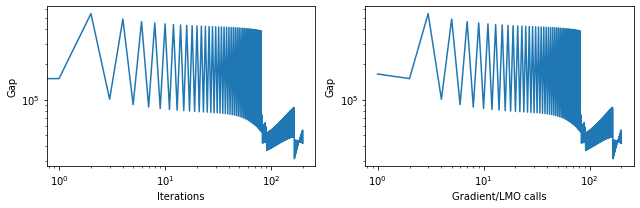

In [8]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.figure(figsize=(9,3))

plt.subplot(1,2,1)
plt.plot(sol[2])

plt.subplot(1,2,2)
plt.plot(sol[1],sol[2])

plt.subplot(1,2,1)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Gap')

plt.subplot(1,2,2)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Gradient/LMO calls')
plt.ylabel('Gap')

plt.tight_layout()